In [1]:
from skimage.io import imread, imshow, imsave

In [2]:
img = imread('tiger-gray-small.png')

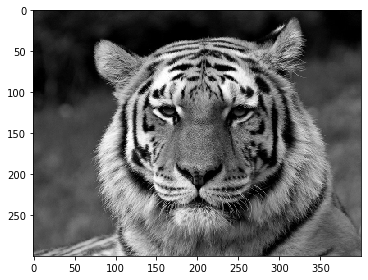

In [3]:
imshow(img);

In [4]:
img

array([[ 38,  36,  36, ...,   1,   2,   2],
       [ 38,  36,  37, ...,   1,   2,   1],
       [ 40,  37,  38, ...,   2,   2,   2],
       ...,
       [141, 141, 137, ..., 117, 110, 111],
       [111, 101,  95, ..., 114, 122, 112],
       [ 97,  97, 109, ..., 123, 113, 116]], dtype=uint8)

In [5]:
img.shape

(300, 400)

In [6]:
import numpy as np

In [7]:
kernel = np.array([[-1, -2, -1], 
                 [-2, 22, -2],
                 [-1, -2, -1]]) / 10

In [8]:
kernel

array([[-0.1, -0.2, -0.1],
       [-0.2,  2.2, -0.2],
       [-0.1, -0.2, -0.1]])

In [9]:
n_rows, n_columns = (img.shape[0], img.shape[1])

In [10]:
out_img = np.zeros((n_rows, n_columns))

In [11]:
out_img.shape

(300, 400)

In [12]:
for i in range(1, n_rows - 1):
    for j in range(1, n_columns - 1):
        out_img[i, j] = np.clip((img[i-1: i+2, j-1: j+2] * kernel).sum(), 0, 255)

In [13]:
out_img

array([[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,  34.4,  37. , ...,   0. ,   2.5,   0. ],
       [  0. ,  35.8,  37.5, ...,   1.3,   2.1,   0. ],
       ...,
       [  0. , 152.4, 148.9, ..., 120.5, 104. ,   0. ],
       [  0. ,  85. ,  74.1, ..., 111.1, 131.9,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [14]:
out_img.min(), out_img.max()

(0.0, 255.0)

In [15]:
out_img = out_img[1:n_rows - 1, 1:n_columns - 1].astype('uint8')

In [16]:
out_img.shape

(298, 398)

In [17]:
img_sharp = imread('unsharp-tiger.png')

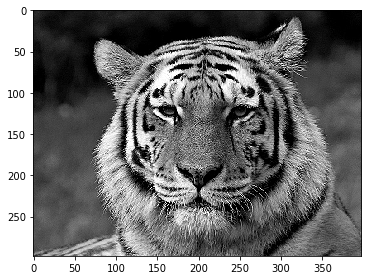

In [18]:
imshow(img_sharp);

In [19]:
img_sharp.shape

(298, 398)

In [20]:
np.array_equal(out_img, img_sharp)

True

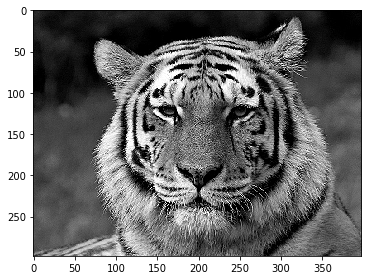

In [21]:
imshow(out_img);

In [22]:
imsave('sharp-tiger-my.png', out_img)